<a href="https://colab.research.google.com/github/heyitssyakirrr/climate_change_impact/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC4600 - Project

In [ ]:
!pip install -r requirements.txt

## 1. Import the Dataset

In [ ]:
import pandas as pd

# Load the kaggle dataset which contains the data about climate change impact on agriculture
df = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

## 2. Data Exploration and Preprocessing

In [ ]:
df.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

In [ ]:
# Check number of rows
df.tail()

Year    Country              Region Crop_Type  Average_Temperature_C  \
9995  2022     France  Nouvelle-Aquitaine    Cotton                  30.48   
9996  1999  Australia          Queensland  Soybeans                   9.53   
9997  2000  Argentina           Patagonia    Coffee                  31.92   
9998  1996     Brazil           Southeast  Soybeans                  13.95   
9999  2015      China               South      Corn                  11.78   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
9995                  685.93             17.64                 3.033   
9996                 2560.38             10.68                 2.560   
9997                  357.76             26.01                 1.161   
9998                 1549.52             17.31                 3.348   
9999                 1676.25              5.34                 3.710   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
9995                       9                27.56                    41.96   
9996                       4                77.02                     5.45   
9997                      10                78.53                    11.94   
9998                       2                42.65                    44.71   
9999                       5                46.41                    48.28   

      Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
9995                     10.95              43.41         No Adaptation   
9996                     82.32              59.39         No Adaptation   
9997                     26.00              41.46      Water Management   
9998                     25.07              75.10         Crop Rotation   
9999                     98.27              59.38      Water Management   

      Economic_Impact_Million_USD  
9995                      1483.06  
9996                       829.61  
9997                       155.99  
9998                      1613.90  
9999                       453.14

There are 10000 rows in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

We have 4 columns with categorical data

### Checking missing values

In [ ]:
# Check null values
df.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

We don't have any missing data entries

### Data encoding

Previously, we discovered 4 categorical columns. We need to encode them to work with ML algorithms in the future steps.

First, we need to choose a technique for encoding based on the properties of the data.

In [ ]:
# Print the possible values of Region in df and the occurence of each one
all_regions = df['Region'].value_counts()
number_regions = len(all_regions)
print(f"We have {number_regions} regions.")
all_regions

We have 34 regions.


Region
South                         754
Northeast                     752
North                         524
Central                       466
Punjab                        288
Victoria                      283
New South Wales               276
East                          273
South West                    270
Ontario                       269
West Bengal                   267
North West                    264
Volga                         261
South East                    260
West                          257
Grand Est                     254
Queensland                    253
Midwest                       253
Nouvelle-Aquitaine            252
Patagonia                     249
Tamil Nadu                    249
Northwest                     247
Siberian                      246
Prairies                      243
British Columbia              242
Provence-Alpes-Cote d’Azur    236
Ile-de-France                 236
North Central                 235
Quebec                        230
Northwestern                  227
Pampas                        224
Maharashtra                   221
Western Australia             220
Southeast                     219
Name: count, dtype: int64

In [ ]:
# Print the possible values of Country in df and the occurence of each one
all_countries = df['Country'].value_counts()
number_countries = len(all_countries)
print(f"We have {number_countries} countries.")
all_countries

We have 10 countries.


Country
USA          1032
Australia    1032
China        1031
Nigeria      1029
India        1025
Canada        984
Argentina     984
France        978
Russia        961
Brazil        944
Name: count, dtype: int64

In [ ]:
# Print the possible values of Adaptation_Strategies in df and the occurence of each one
all_adaptation_strategies = df['Adaptation_Strategies'].value_counts()
number_adaptaion_strategies = len(all_adaptation_strategies)
print(f"We have {number_adaptaion_strategies} adaptation strategies.")
all_adaptation_strategies

We have 5 adaptation strategies.


Adaptation_Strategies
Water Management           2049
No Adaptation              2024
Drought-resistant Crops    1995
Organic Farming            1975
Crop Rotation              1957
Name: count, dtype: int64

In [ ]:
# Print the possible values of Crop_Type in df and the occurence of each one
all_crop_types = df['Crop_Type'].value_counts()
number_crop_types = len(all_crop_types)
print(f"We have {number_crop_types} crop types.")
all_crop_types

We have 10 crop types.


Crop_Type
Wheat         1047
Cotton        1044
Vegetables    1036
Corn          1022
Rice          1022
Sugarcane      995
Fruits         979
Soybeans       958
Barley         952
Coffee         945
Name: count, dtype: int64

The region is attached to every single country exclusively. So we can combine both columns.

In [ ]:
# Add a new Country_Region that contains the concatenation of the Country and Region columns
df['Country_Region'] = df['Country'] + ' ' + df['Region']

# Drop the Country and Region columns
df = df.drop(columns=['Country', 'Region'])

In [ ]:
df.head()

Year  Crop_Type  Average_Temperature_C  Total_Precipitation_mm  \
0  2001       Corn                   1.55                  447.06   
1  2024       Corn                   3.23                 2913.57   
2  2001      Wheat                  21.11                 1301.74   
3  2001     Coffee                  27.85                 1154.36   
4  1998  Sugarcane                   2.19                 1627.48   

   CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
0             15.22                 1.737                       8   
1             29.82                 1.737                       8   
2             25.75                 1.719                       5   
3             13.91                 3.890                       5   
4             11.81                 1.080                       9   

   Irrigation_Access_%  Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
0                14.54                    10.08                     14.78   
1                11.05                    33.06                     23.25   
2                84.42                    27.41                     65.53   
3                94.06                    14.38                     87.58   
4                95.75                    44.35                     88.08   

   Soil_Health_Index Adaptation_Strategies  Economic_Impact_Million_USD  \
0              83.25      Water Management                       808.13   
1              54.02         Crop Rotation                       616.22   
2              67.78      Water Management                       796.96   
3              91.39         No Adaptation                       790.32   
4              49.61         Crop Rotation                       401.72   

         Country_Region  
0     India West Bengal  
1           China North  
2  France Ile-de-France  
3       Canada Prairies  
4      India Tamil Nadu

As the total new columns after using the one-hot-encoding is around 50, we can proceed as the number is acceptable.

standard deviation between the regions for each specific country

In [ ]:
df = pd.get_dummies(df, columns=['Country_Region', 'Crop_Type'])

In [ ]:
df.head()

Year  Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
0  2001                   1.55                  447.06             15.22   
1  2024                   3.23                 2913.57             29.82   
2  2001                  21.11                 1301.74             25.75   
3  2001                  27.85                 1154.36             13.91   
4  1998                   2.19                 1627.48             11.81   

   Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
0                 1.737                       8                14.54   
1                 1.737                       8                11.05   
2                 1.719                       5                84.42   
3                 3.890                       5                94.06   
4                 1.080                       9                95.75   

   Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  Soil_Health_Index  ...  \
0                    10.08                     14.78              83.25  ...   
1                    33.06                     23.25              54.02  ...   
2                    27.41                     65.53              67.78  ...   
3                    14.38                     87.58              91.39  ...   
4                    44.35                     88.08              49.61  ...   

  Crop_Type_Barley  Crop_Type_Coffee  Crop_Type_Corn  Crop_Type_Cotton  \
0            False             False            True             False   
1            False             False            True             False   
2            False             False           False             False   
3            False              True           False             False   
4            False             False           False             False   

   Crop_Type_Fruits  Crop_Type_Rice  Crop_Type_Soybeans  Crop_Type_Sugarcane  \
0             False           False               False                False   
1             False           False               False                False   
2             False           False               False                False   
3             False           False               False                False   
4             False           False               False                 True   

   Crop_Type_Vegetables  Crop_Type_Wheat  
0                 False            False  
1                 False            False  
2                 False             True  
3                 False            False  
4                 False            False  

[5 rows x 62 columns]

In [ ]:
# Change categorical data in Adaption_Strategies to labels (0, 1, 2, ...)
df['Adaptation_Strategies'] = df['Adaptation_Strategies'].astype('category').cat.codes

In [ ]:
df.head()

Year  Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
0  2001                   1.55                  447.06             15.22   
1  2024                   3.23                 2913.57             29.82   
2  2001                  21.11                 1301.74             25.75   
3  2001                  27.85                 1154.36             13.91   
4  1998                   2.19                 1627.48             11.81   

   Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
0                 1.737                       8                14.54   
1                 1.737                       8                11.05   
2                 1.719                       5                84.42   
3                 3.890                       5                94.06   
4                 1.080                       9                95.75   

   Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  Soil_Health_Index  ...  \
0                    10.08                     14.78              83.25  ...   
1                    33.06                     23.25              54.02  ...   
2                    27.41                     65.53              67.78  ...   
3                    14.38                     87.58              91.39  ...   
4                    44.35                     88.08              49.61  ...   

   Crop_Type_Barley  Crop_Type_Coffee  Crop_Type_Corn  Crop_Type_Cotton  \
0             False             False            True             False   
1             False             False            True             False   
2             False             False           False             False   
3             False              True           False             False   
4             False             False           False             False   

   Crop_Type_Fruits  Crop_Type_Rice  Crop_Type_Soybeans  Crop_Type_Sugarcane  \
0             False           False               False                False   
1             False           False               False                False   
2             False           False               False                False   
3             False           False               False                False   
4             False           False               False                 True   

   Crop_Type_Vegetables  Crop_Type_Wheat  
0                 False            False  
1                 False            False  
2                 False             True  
3                 False            False  
4                 False            False  

[5 rows x 62 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 62 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              10000 non-null  int64  
 1   Average_Temperature_C                             10000 non-null  float64
 2   Total_Precipitation_mm                            10000 non-null  float64
 3   CO2_Emissions_MT                                  10000 non-null  float64
 4   Crop_Yield_MT_per_HA                              10000 non-null  float64
 5   Extreme_Weather_Events                            10000 non-null  int64  
 6   Irrigation_Access_%                               10000 non-null  float64
 7   Pesticide_Use_KG_per_HA                           10000 non-null  float64
 8   Fertilizer_Use_KG_per_HA                          10000 non-null  float64
 9   Soil_Health_Index 

### Check for outliers

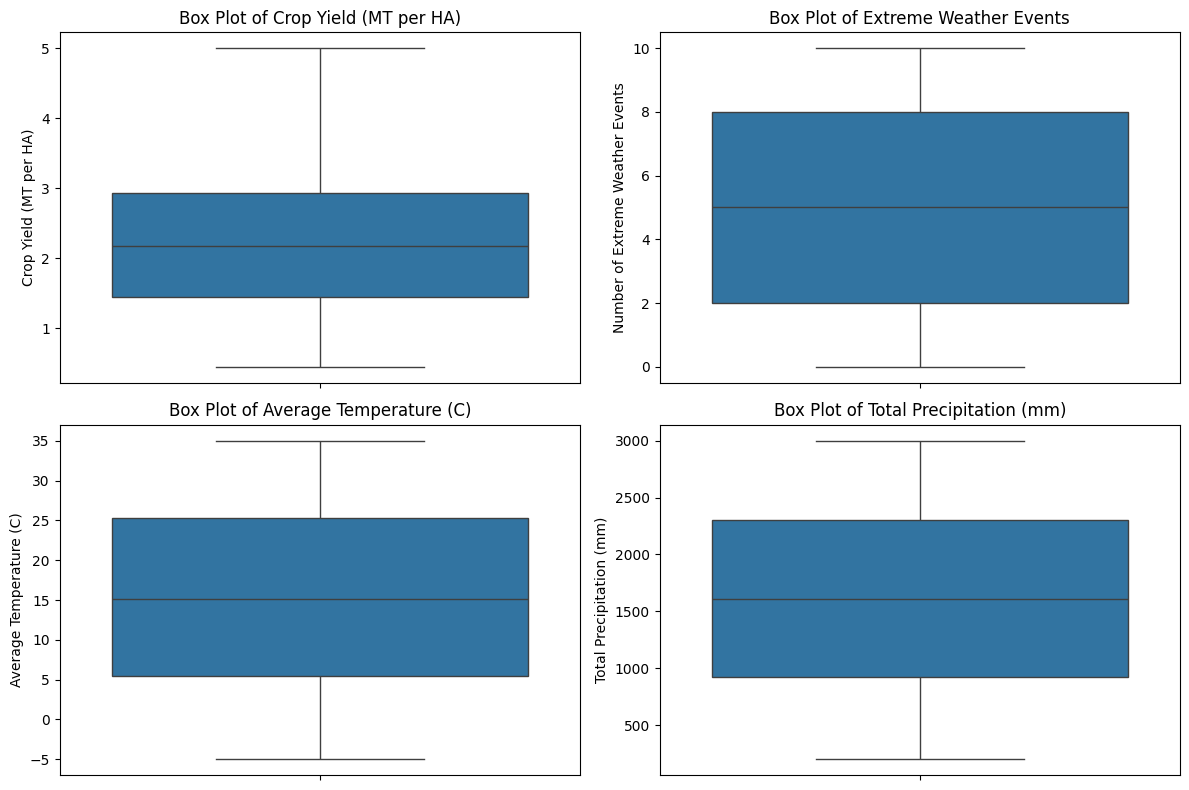

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

# Box plot for Crop Yield
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Crop_Yield_MT_per_HA'])
plt.title('Box Plot of Crop Yield (MT per HA)')
plt.ylabel('Crop Yield (MT per HA)')

# Box plot for Extreme Weather Events
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Extreme_Weather_Events'])
plt.title('Box Plot of Extreme Weather Events')
plt.ylabel('Number of Extreme Weather Events')

# Box plot for Average Temperature
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Average_Temperature_C'])
plt.title('Box Plot of Average Temperature (C)')
plt.ylabel('Average Temperature (C)')

# Box plot for Total Precipitation
plt.subplot(2, 2, 4)
sns.boxplot(y=df['Total_Precipitation_mm'])
plt.title('Box Plot of Total Precipitation (mm)')
plt.ylabel('Total Precipitation (mm)')

plt.tight_layout()
plt.show()

We can see that the key features present no outliers.



### Data normalization

In [ ]:
# Let's use maximum absolute scaling to normalize the numerical data
df_max_scaled = df.copy()

for column in df_max_scaled.select_dtypes(include=['int64', 'float64']).columns:
    df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

In [ ]:
df_max_scaled.head()

Year  Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
0  0.988636               0.044286                0.149036          0.507333   
1  1.000000               0.092286                0.971297          0.994000   
2  0.988636               0.603143                0.433961          0.858333   
3  0.988636               0.795714                0.384829          0.463667   
4  0.987154               0.062571                0.542553          0.393667   

   Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
0                0.3474                     0.8             0.145415   
1                0.3474                     0.8             0.110511   
2                0.3438                     0.5             0.844284   
3                0.7780                     0.5             0.940694   
4                0.2160                     0.9             0.957596   

   Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  Soil_Health_Index  ...  \
0                 0.201640                  0.147815             0.8325  ...   
1                 0.661332                  0.232523             0.5402  ...   
2                 0.548310                  0.655366             0.6778  ...   
3                 0.287658                  0.875888             0.9139  ...   
4                 0.887177                  0.880888             0.4961  ...   

   Crop_Type_Barley  Crop_Type_Coffee  Crop_Type_Corn  Crop_Type_Cotton  \
0             False             False            True             False   
1             False             False            True             False   
2             False             False           False             False   
3             False              True           False             False   
4             False             False           False             False   

   Crop_Type_Fruits  Crop_Type_Rice  Crop_Type_Soybeans  Crop_Type_Sugarcane  \
0             False           False               False                False   
1             False           False               False                False   
2             False           False               False                False   
3             False           False               False                False   
4             False           False               False                 True   

   Crop_Type_Vegetables  Crop_Type_Wheat  
0                 False            False  
1                 False            False  
2                 False             True  
3                 False            False  
4                 False            False  

[5 rows x 62 columns]

In [ ]:
# print the min and max of each column
df_max_scaled.describe().loc[['min', 'max']]


Year  Average_Temperature_C  Total_Precipitation_mm  \
min  0.983202              -0.142571                0.066724   
max  1.000000               1.000000                1.000000   

     CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
min          0.016667                  0.09                     0.0   
max          1.000000                  1.00                     1.0   

     Irrigation_Access_%  Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
min              0.10011                      0.0                    0.0001   
max              1.00000                      1.0                    1.0000   

     Soil_Health_Index  Adaptation_Strategies  Economic_Impact_Million_USD  
min                0.3                    0.0                     0.020388  
max                1.0                    4.0                     1.000000

Compare with scalarization

In [ ]:
df = df_max_scaled

## 3. Feature Seletion and Engineering

In [ ]:
# Check the number of years in the dataset
years = df['Year'].unique()
number_years = len(years)

print(f"We have data for {number_years} years.")

We have data for 35 years.


It makes sense to exploit the data to predict the adaption strategy, depending on data such as temperature, precipications, emissions, crop yield and type, weather, etc.

In that case, the year doesn't matter as geological changes are negligeable ina 35-year time frame.

So, we can drop the Year column.

In [ ]:
# Drop the Year column
df = df.drop(columns=['Year'])

Let's map a scatterplot (pair grid plot) to determine the linearly dependent features among the non-encoded columns.

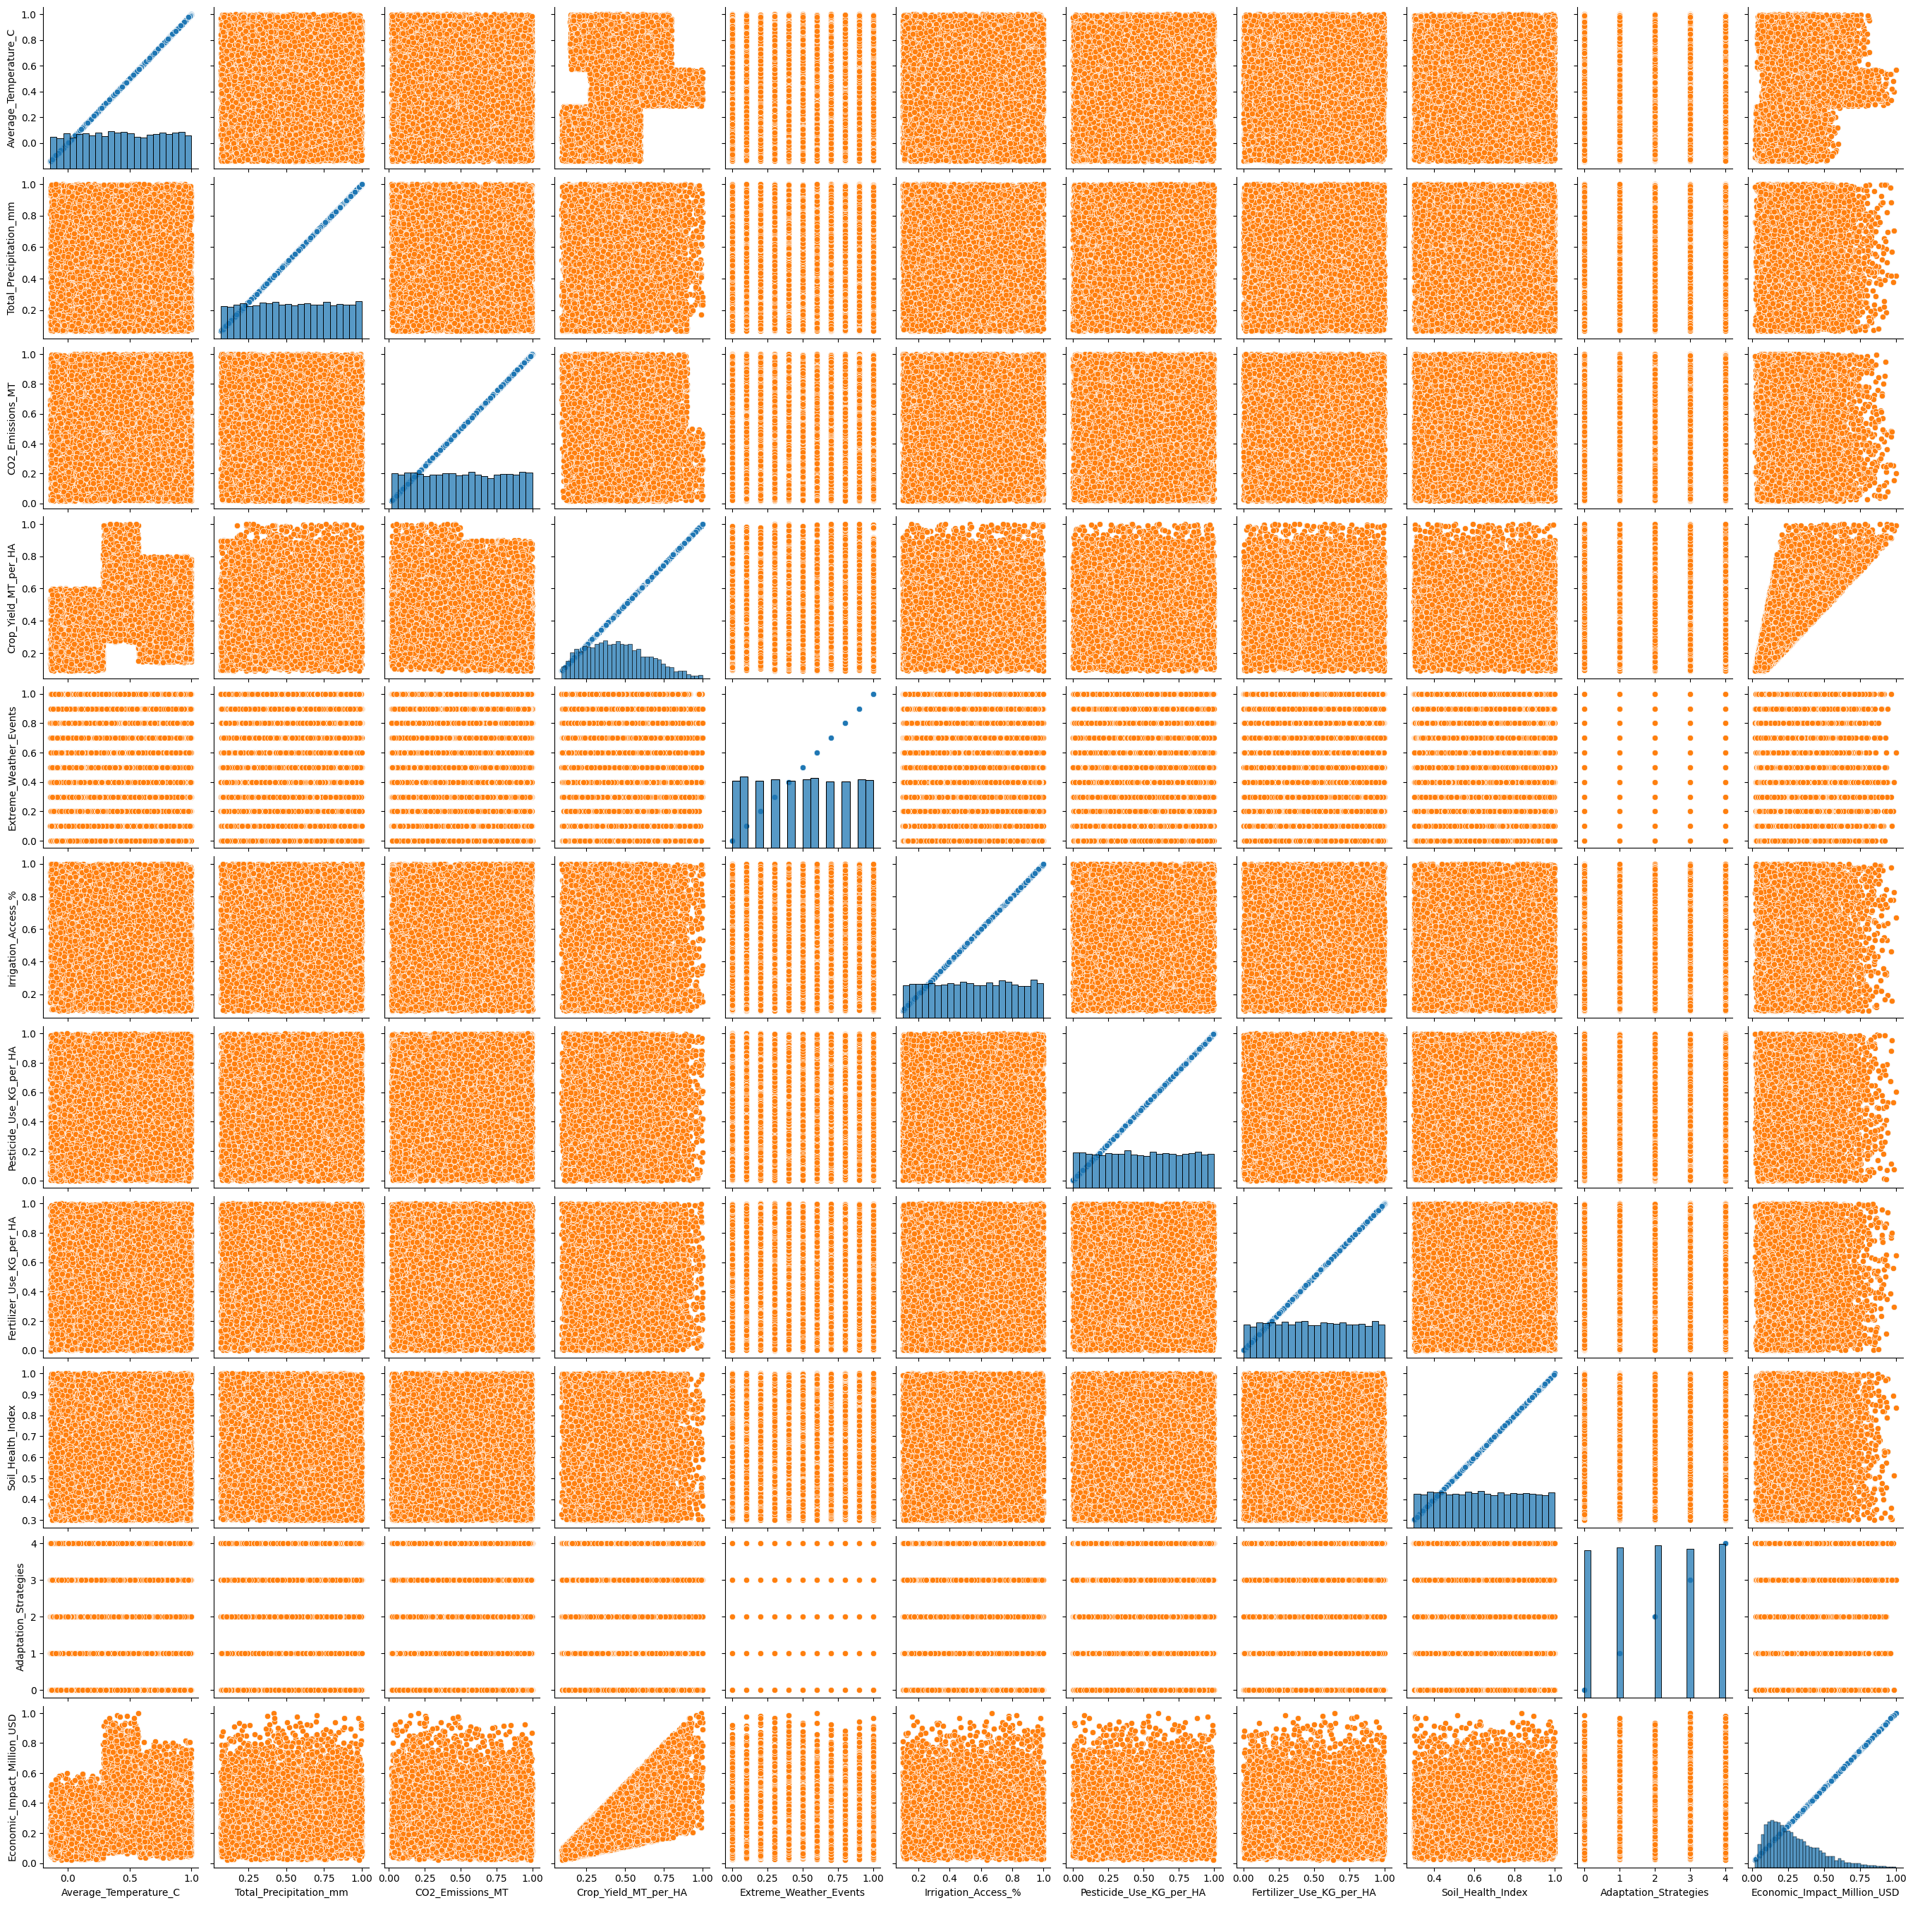

In [ ]:
# Plot the pair grid for the first 11 columns
pairplot = sns.pairplot(df.iloc[:, :11])
pairplot.map(sns.scatterplot)
pairplot.add_legend()

plt.show()

We can notice that the Crop_Yield_MT_per_HA (for crop yield) and Economic_Impact_Million_USD (for economic impact) are linearly dependent. Thus, it makes sense to get rid of one of them for the sake of regression and classification.

In our case, the crop yield information is more critical. Therefore, we can drop the Economic_Impact_Million_USD column.

In [ ]:
# Drop the Economic_Impact_Million_USD column
df = df.drop(columns=['Economic_Impact_Million_USD'])

We can also study highly-correlated features using a heatmap (Correlation matrix).

<Axes: >

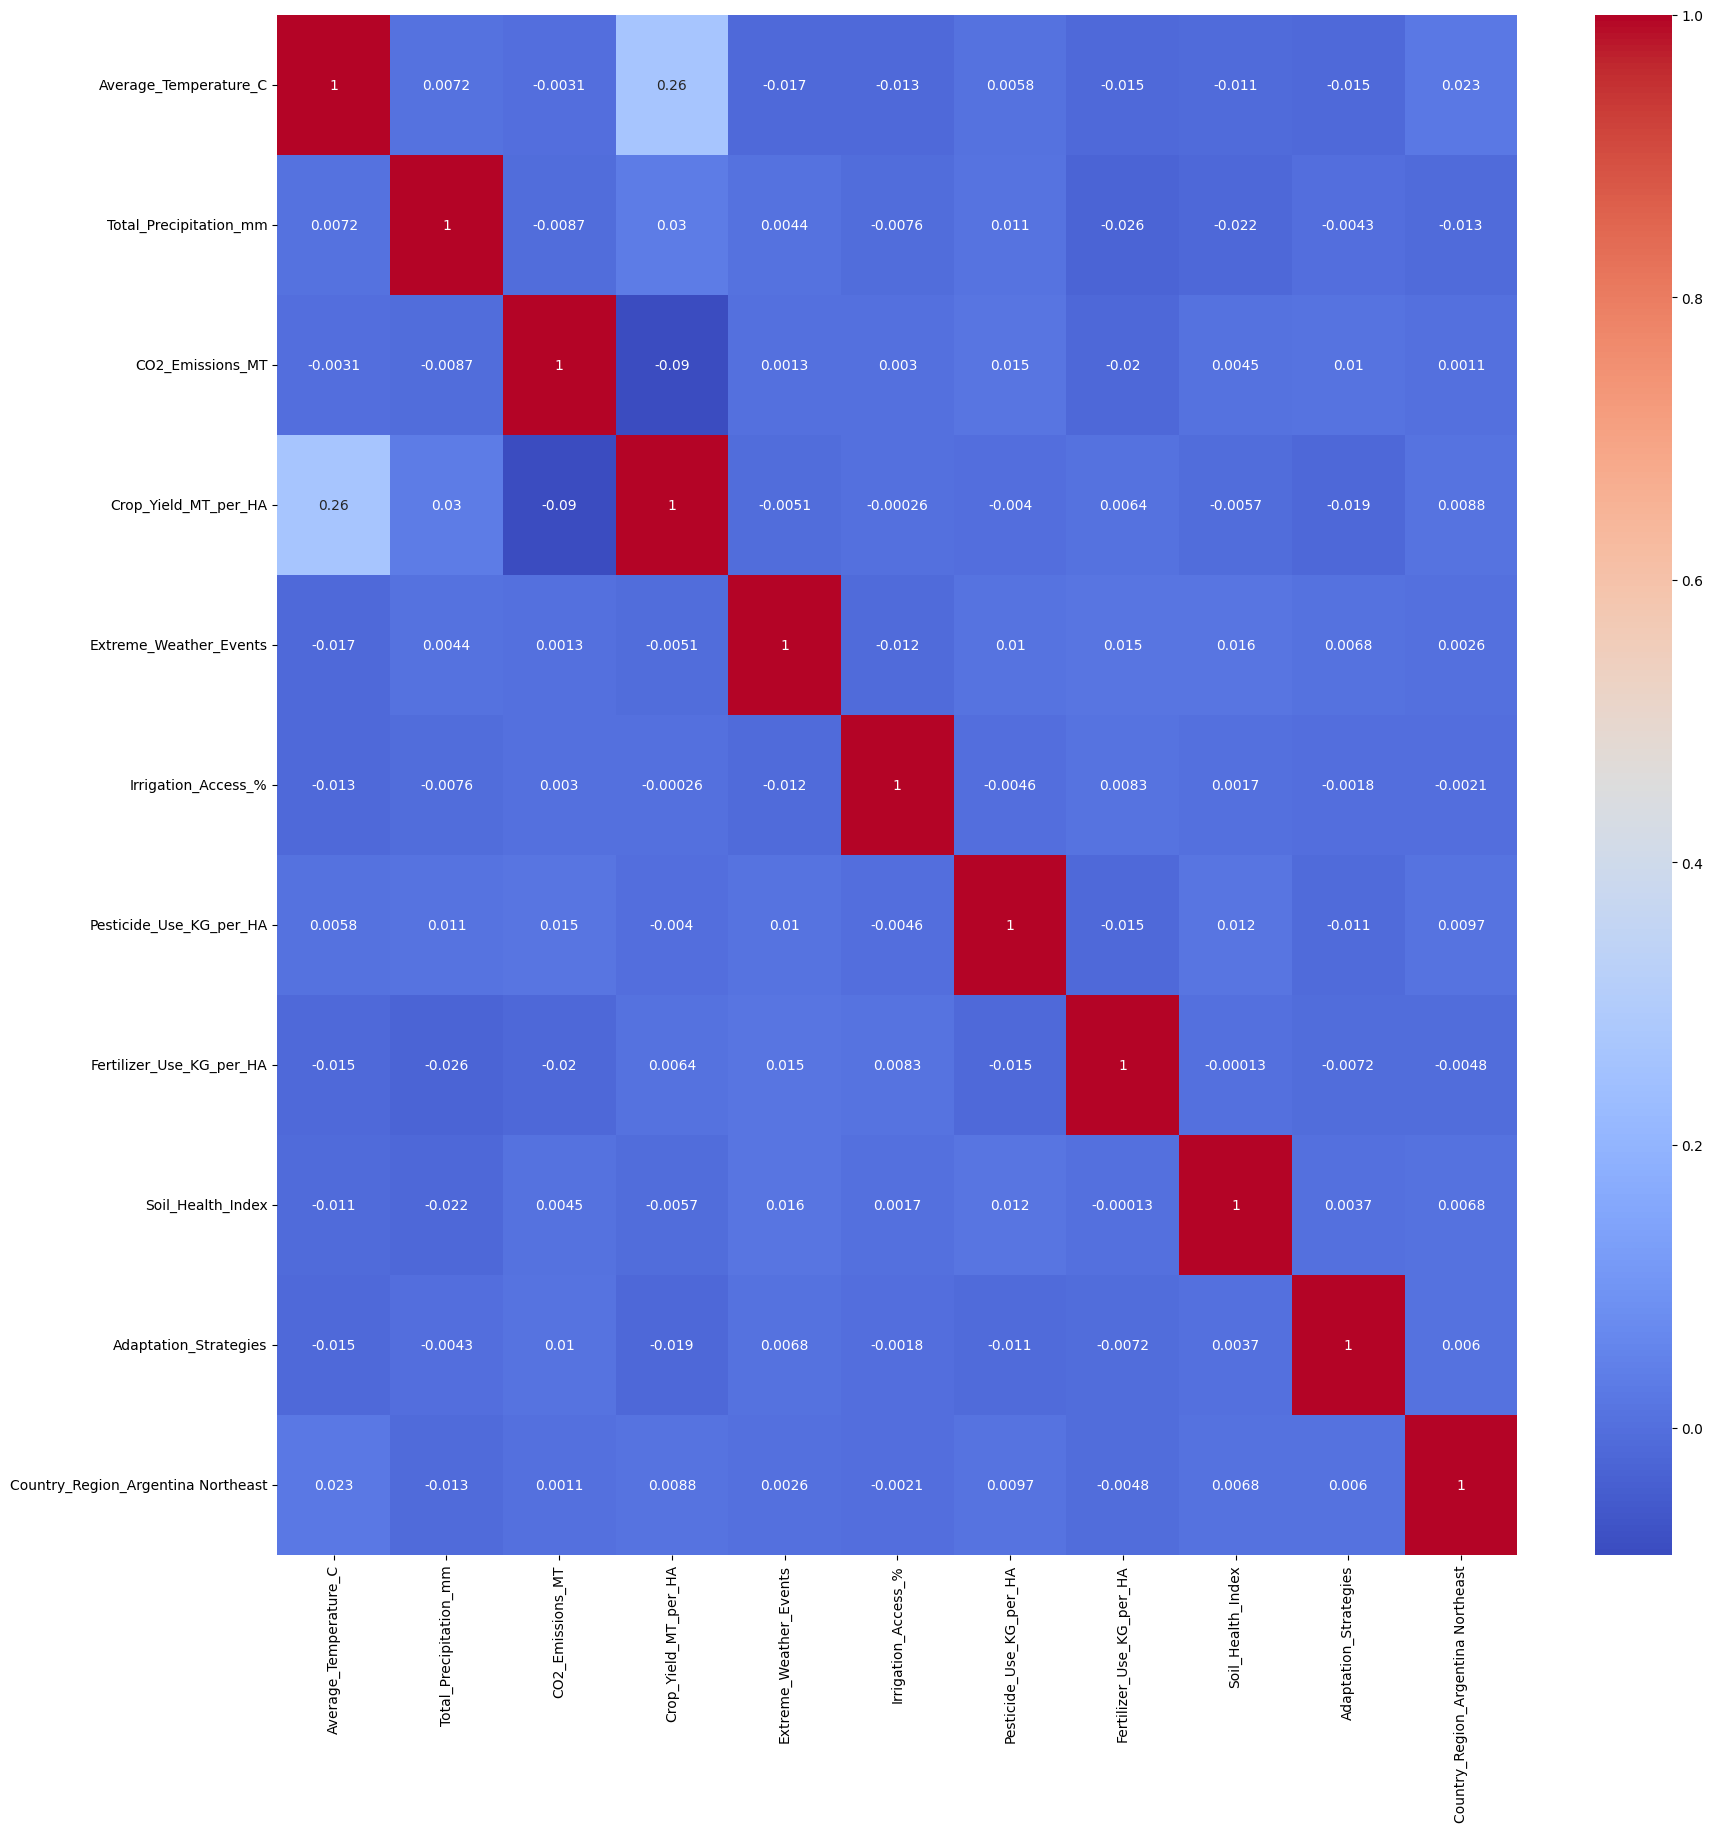

In [ ]:
# Plot a correlation matrix for the data
plt.figure(figsize=(20, 20))
sns.heatmap(df.iloc[:, :11].corr(), annot=True, cmap='coolwarm')

All features are lowly correlated (abs < 0.5), which means each feature is important for the contribution to the model trainings.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Average_Temperature_C                             10000 non-null  float64
 1   Total_Precipitation_mm                            10000 non-null  float64
 2   CO2_Emissions_MT                                  10000 non-null  float64
 3   Crop_Yield_MT_per_HA                              10000 non-null  float64
 4   Extreme_Weather_Events                            10000 non-null  float64
 5   Irrigation_Access_%                               10000 non-null  float64
 6   Pesticide_Use_KG_per_HA                           10000 non-null  float64
 7   Fertilizer_Use_KG_per_HA                          10000 non-null  float64
 8   Soil_Health_Index                                 10000 non-null  float64
 9   Adaptation_Strateg

# TODO: USE FEATURE IMPORTANCE ANALYSIS IN HERE

Let's add is_critical column to indicate whether the region is facing a food crisis with the current parameters.

Before that, we can do some data visualization to define the conditiosn for a critical food situation.

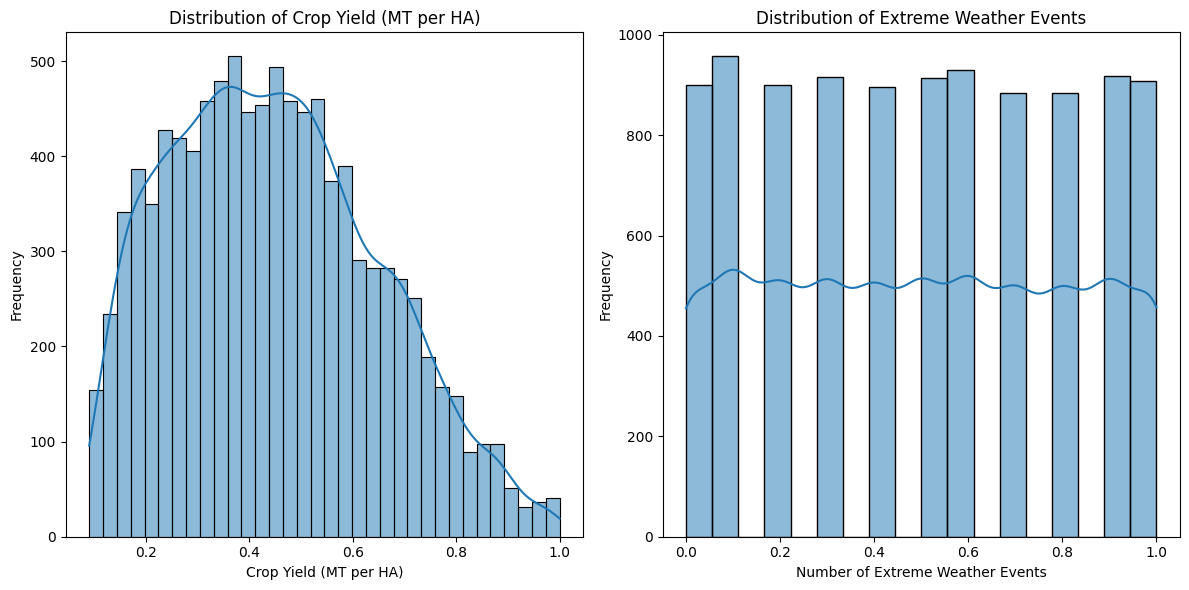

In [ ]:
# Let's start by visualizing Crop_Yield_MT_per_HA and Extreme_Weather_Events value distribution
plt.figure(figsize=(12, 6))

# Histogram for Crop Yield
plt.subplot(1, 2, 1)
sns.histplot(df['Crop_Yield_MT_per_HA'], kde=True)
plt.title('Distribution of Crop Yield (MT per HA)')
plt.xlabel('Crop Yield (MT per HA)')
plt.ylabel('Frequency')

# Histogram for Extreme Weather Events
plt.subplot(1, 2, 2)
sns.histplot(df['Extreme_Weather_Events'], kde=True)
plt.title('Distribution of Extreme Weather Events')
plt.xlabel('Number of Extreme Weather Events')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Also make sure of the adaptation strategy in here

In [ ]:
# Add a new column for classification
# This column will contain 0 if the food situation is non-critical, and 1 otherwise

# Define the criteria for a critical food situation
def is_critical(row):
    if row['Crop_Yield_MT_per_HA'] < threshold_yield or row['Extreme_Weather_Events'] > threshold_events:
        return 1
    else:
        return 0

threshold_yield = 0.3
threshold_events = 0.8

# Apply the function to create the new column
df['is_critical'] = df.apply(is_critical, axis=1)

In [ ]:
print(df[['Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'is_critical']].head())


   Crop_Yield_MT_per_HA  Extreme_Weather_Events  is_critical
0                0.3474                     0.8            0
1                0.3474                     0.8            0
2                0.3438                     0.5            0
3                0.7780                     0.5            0
4                0.2160                     0.9            1


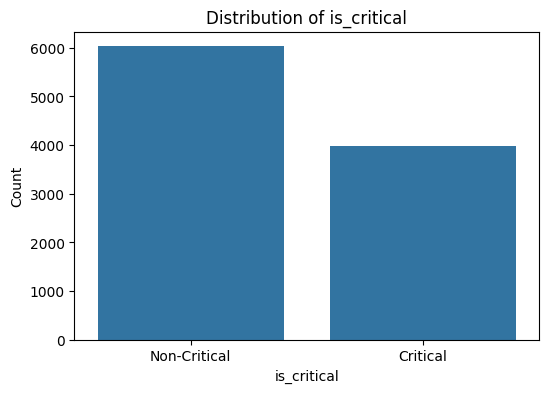

In [ ]:
# Check the balance of the data in order to accurately choose the classification metrics
# Count the occurrences of each class
critical_counts = df['is_critical'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=critical_counts.index, y=critical_counts.values)
plt.title('Distribution of is_critical')
plt.xlabel('is_critical')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Critical', 'Critical'])
plt.show()

In [ ]:
# Final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Average_Temperature_C                             10000 non-null  float64
 1   Total_Precipitation_mm                            10000 non-null  float64
 2   CO2_Emissions_MT                                  10000 non-null  float64
 3   Crop_Yield_MT_per_HA                              10000 non-null  float64
 4   Extreme_Weather_Events                            10000 non-null  float64
 5   Irrigation_Access_%                               10000 non-null  float64
 6   Pesticide_Use_KG_per_HA                           10000 non-null  float64
 7   Fertilizer_Use_KG_per_HA                          10000 non-null  float64
 8   Soil_Health_Index                                 10000 non-null  float64
 9   Adaptation_Strateg

Explain the features and the target
Compare whether we take the adaptation as prescription, or do cascading (induce the features, and then predict the target)

## 4. Data Splitting

In [ ]:
# K-Fold Cross Validation
from sklearn.model_selection import KFold

df_copy = df.copy()

X = df.drop(columns=['Adaptation_Strategies'])
y = df['Adaptation_Strategies']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("Training set size:", X_train.shape)
    print("Test set size:", X_test.shape)

Training set size: (8000, 60)
Test set size: (2000, 60)
Training set size: (8000, 60)
Test set size: (2000, 60)
Training set size: (8000, 60)
Test set size: (2000, 60)
Training set size: (8000, 60)
Test set size: (2000, 60)
Training set size: (8000, 60)
Test set size: (2000, 60)


In [ ]:
# Holdout validation
from sklearn.model_selection import train_test_split

df = df_copy

X = df.drop(columns=['Adaptation_Strategies'])
y = df['Adaptation_Strategies']

# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (8000, 60)
Test set size: (2000, 60)


While K-Fold offers more reliable estimate of the model performance, we should stick with holdout validation as it is simple and quick to impelement, especsially as the dataset is big enough.

## 5. Discussing the Data Mining Algorithms for Classification

We will train and compare 5 Classification models:

1. LogisticClassifier
2. KNN
3. Decision Tree
4. Support Vector Machine
5. Feedforward Neural Network

We will use Grid Search for hypertuning the parameters of the models trianing

## 6. Hypertuning and Model Training

### A decision tree-based model : Decision Tree

First, we import and create a DecisionTreeClassifier model.
Then we train the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train)

# Evaluate using mean accuaracy
print("Mean accuracy: ", DTClassifier.score(X_test, y_test))

Mean accuracy:  0.1865


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=2, cv=3, scoring="accuracy")
grid_search_dt.fit(X_train, y_train)

print("Tuned Hyperparameters :", grid_search_dt.best_params_)
print("Accuracy :", grid_search_dt.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10,

In [ ]:
import time

DTClassifier = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10)

start = time.time()
DTClassifier.fit(X_train, y_train)
end = time.time()

print("Time taken to train the model: ", round(end-start, 4), "seconds.")

# Evaluate using mean accuaracy
print("Mean accuracy: ", DTClassifier.score(X_test, y_test))

Time taken to train the model:  0.5848 seconds.
Mean accuracy:  0.2035


### A regression or classification model : Logitic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

# Declare and train a logistic regression model using multinomial strategy
multi_lr = LogisticRegression(max_iter=1000)
multi_lr.fit(X_train, y_train)

# Evaluate using mean accuaracy
print("Mean accuracy: ", multi_lr.score(X_test, y_test))


Mean accuracy:  0.201


Now we can the the hypertuning.

In [ ]:
# Declare and train a logistic regression model using GridSearchCV to find the best hyperparameters
# Specify GridSearchCV as in intruction
params = [
    {"penalty": ["l2"], "C": np.logspace(-10, 10, 7), "solver": ["newton-cg", "lbfgs"]},
    {"penalty": ["l1", "l2"], "C": np.logspace(-10, 10, 7), "solver": ["liblinear"]},
]

grid_search_clf = GridSearchCV(LogisticRegression(max_iter=1000), params, verbose=2, cv=3, scoring="accuracy")
grid_search_clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END ..............C=1e-10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..............C=1e-10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..............C=1e-10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=1e-10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..................C=1e-10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..................C=1e-10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=2.1544346900318867e-07, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=2.1544346900318867e-07, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=2.1544346900318867e-07, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .C=2.1544346900318867e-07, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=2.1544346900318867e-07, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=2.1544346900318867e-07, pen

Then, we create a new model with the Tuned Hyperparameters.

In [ ]:
# Declare and train a logistic regression model using multinomial strategy
multi_lr = LogisticRegression(max_iter=1000, penalty="l2", C=1e-10, solver="newton-cg")

start = time.time()
multi_lr.fit(X_train, y_train)
end = time.time()

print("Time taken to train the model: ", round(end-start, 4), "seconds.")

# Evaluate using mean accuaracy
print("Mean accuracy: ", multi_lr.score(X_test, y_test))

Time taken to train the model:  0.1803 seconds.
Mean accuracy:  0.1955


### A distance-based model : KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)

# Evaluate using mean accuaracy
print("Mean accuracy: ", KNC.score(X_test, y_test))

Mean accuracy:  0.2085


Hypertuning

In [ ]:
# Declare and train knn inside GridSearchCV
param_grid = {"n_neighbors": list(range(1, 5)), "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan", "chebyshev"]}
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=2, cv=3, scoring="accuracy")
knn_clf_gs.fit(X_train, y_train)

print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", knn_clf_gs.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.3s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.5s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=2, weig

In [ ]:
# Predict y_pred_knn_gs using the best model
knn_clf = KNeighborsClassifier(n_neighbors=4, weights="uniform", metric="chebyshev")

start=time.time()
knn_clf.fit(X_train, y_train)
end = time.time()

print("Time taken to train the model: ", round(end-start, 4), "seconds.")

print("Mean accuracy: ", knn_clf.score(X_test, y_test))

Time taken to train the model:  0.0105 seconds.
Mean accuracy:  0.207


### A kernel-based model: Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report


# Define the SVM model
svm_model = SVC()

param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.01],
    'kernel': ['rbf', 'poly']
}

grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=2)
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   5.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   2.5s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   2.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   5.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   5.7s
[CV] END ..........................C=1, gamma=1, 

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.01],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [ ]:
# Print the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
svm_best = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

start=time.time()
svm_best.fit(X_train, y_train)
end = time.time()

print("Time taken to train the model: ", round(end-start, 4), "seconds.")
print("Mean Accuracy: ", svm_best.score(X_test, y_test))

Time taken to train the model:  20.2843 seconds.
Mean Accuracy:  0.205


### Feedforward Neural Network

Train a CNN using different runtime

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu'))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer 1
    model.add(Dense(16, activation='relu'))  # Hidden layer 2
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create model
nn_model = create_model('SGD')

In [ ]:
import time

start = time.time()

# Fit the neural network model
nn_model.fit(X_train, y_train, epochs=10, batch_size=5)
end = time.time()

print("Time taken to train the model: ", round(end-start, 4), "seconds.")


Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1986 - loss: nan
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1936 - loss: nan
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1962 - loss: nan
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1940 - loss: nan
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.1942 - loss: nan
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2032 - loss: nan
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1912 - loss: nan
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1909 - loss: nan
Epoch 9/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1954 - loss: nan
Epoch 10/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1974 - loss: nan
Time taken to train the model:  34.1487 seconds.


## 7. Performance Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Define a function to generate the performace metrics evaluation for a model
def evaluate_model(model, X_test, y_test):
    # Predict the classes
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print()
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

In [ ]:
# Evaluate Decision Tree
print("Evaluate Decision Tree:")
evaluate_model(DTClassifier, X_test, y_test)



Evaluate Decision Tree:
Accuracy: 0.2035

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.22      0.21       393
           1       0.22      0.20      0.21       404
           2       0.24      0.23      0.23       433
           3       0.20      0.18      0.19       379
           4       0.17      0.18      0.17       391

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.20      0.20      0.20      2000


Confusion Matrix:
[[ 88  64  84  65  92]
 [ 96  82  83  71  72]
 [103  81  98  69  82]
 [ 92  64  69  70  84]
 [ 80  88  81  73  69]]




In [ ]:
# Evaluate Logistics Regression
print("Evaluate Logistics Regression:")
evaluate_model(multi_lr, X_test, y_test)


Evaluate Logistics Regression:
Accuracy: 0.1955

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.00      0.00      0.00       404
           2       0.00      0.00      0.00       433
           3       0.00      0.00      0.00       379
           4       0.20      1.00      0.33       391

    accuracy                           0.20      2000
   macro avg       0.04      0.20      0.07      2000
weighted avg       0.04      0.20      0.06      2000


Confusion Matrix:
[[  0   0   0   0 393]
 [  0   0   0   0 404]
 [  0   0   0   0 433]
 [  0   0   0   0 379]
 [  0   0   0   0 391]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate K-Nearest Neighbours
print("Evaluate KNN:")
evaluate_model(KNC, X_test, y_test)

Evaluate KNN:
Accuracy: 0.2085

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.27      0.22       393
           1       0.25      0.25      0.25       404
           2       0.23      0.21      0.22       433
           3       0.19      0.18      0.19       379
           4       0.19      0.13      0.15       391

    accuracy                           0.21      2000
   macro avg       0.21      0.21      0.21      2000
weighted avg       0.21      0.21      0.21      2000


Confusion Matrix:
[[105  76  84  75  53]
 [106 102  61  77  58]
 [121  82  90  80  60]
 [106  74  80  69  50]
 [114  78  85  63  51]]




In [ ]:
# Evaluate Support Vector Machine (SVM)
print("Evaluate SVM:")
evaluate_model(svm_best, X_test, y_test)

Evaluate SVM:
Accuracy: 0.205

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.17      0.18       393
           1       0.23      0.22      0.23       404
           2       0.20      0.18      0.19       433
           3       0.19      0.21      0.20       379
           4       0.20      0.25      0.22       391

    accuracy                           0.20      2000
   macro avg       0.21      0.21      0.20      2000
weighted avg       0.21      0.20      0.20      2000


Confusion Matrix:
[[ 67  75  80  78  93]
 [ 69  89  63  88  95]
 [ 93  84  78  86  92]
 [ 62  63  75  79 100]
 [ 63  68  85  78  97]]




In [ ]:
from sklearn import metrics

# Evaluate Neural Network
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score
def print_clf_metrics(y_actual, y_pred):
    print("Accuracy: ", metrics.accuracy_score(y_actual, y_pred))
    print("Precision: ", metrics.precision_score(y_actual, y_pred, average="weighted"))
    print("Recall: ", metrics.recall_score(y_actual, y_pred, average="weighted"))
    print("F1 Score: ", metrics.f1_score(y_actual, y_pred, average="weighted"))

# Predict the test data
y_pred = nn_model.predict(X_test)

# Print classification metrics
print_clf_metrics(y_test, (y_pred > 0.5).astype(int))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy:  0.1965
Precision:  0.03861225
Recall:  0.1965
F1 Score:  0.064541997492687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 8. Results Discussion and Conclusion (To be done by the next pair)